In [33]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from loguru import logger
import numpy as np
import warnings
import matplotlib.pyplot as plt
import json

warnings.filterwarnings("ignore", category=FutureWarning)

In [34]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )
df = pd.read_parquet(datafile)
df.head()
df.dtypes

timestamp             datetime64[ns, UTC]
message                            object
author                             object
has_emoji                            bool
is_topk                              bool
message_length                      int64
has_link                             bool
timestamp_category               category
hour                               object
day_of_week                         int32
msg_length                          int64
dtype: object

# Example User Stories & Correlations

In [35]:
print(df.dtypes)


timestamp             datetime64[ns, UTC]
message                            object
author                             object
has_emoji                            bool
is_topk                              bool
message_length                      int64
has_link                             bool
timestamp_category               category
hour                               object
day_of_week                         int32
msg_length                          int64
dtype: object


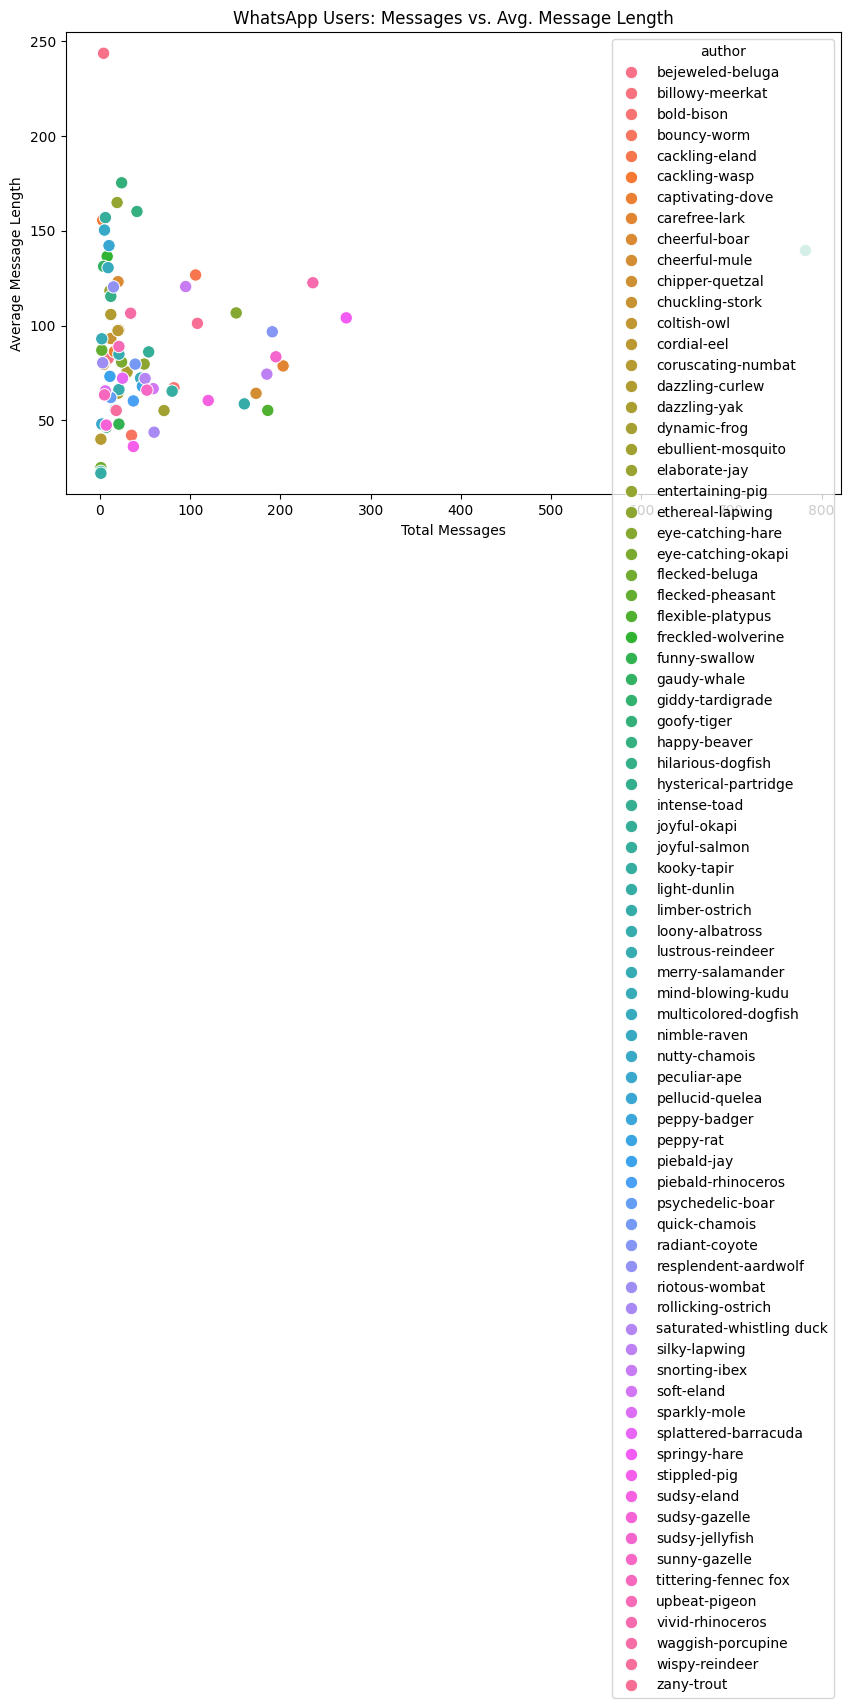

In [36]:
# Group by author to calculate metrics
user_stats = (
    df.groupby("author")
      .agg(total_messages=("message", "count"),
           avg_msg_length=("msg_length", "mean"))
      .reset_index()
)

# Scatter plot with seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(data=user_stats, 
                x="total_messages", 
                y="avg_msg_length", 
                hue="author",   # optional, color by author
                s=80)           # marker size

plt.title("WhatsApp Users: Messages vs. Avg. Message Length")
plt.xlabel("Total Messages")
plt.ylabel("Average Message Length")
plt.show()

In [ ]:
import json

# your JSON string
json_str = """{
  "bejeweled-beluga": "Jan Willem Fijen",
  "billowy-meerkat": "Cosimo  Latorre",
  "bold-bison": "Cora",
  "bouncy-worm": "Fien",
  "cackling-eland": "Maya Sermeno",
  "cackling-wasp": "Paul Albada Jelgersma",
  "captivating-dove": "Bierangna",
  "carefree-lark": "Maureen De Keyzer",
  "cheerful-boar": "Rinus Friederichs 223",
  "cheerful-mule": "Joan Dest",
  "chipper-quetzal": "Siam",
  "chuckling-stork": "Diana Blitz",
  "coltish-owl": "Lex Eisenhardt",
  "cordial-eel": "Femke",
  "coruscating-numbat": "Tobias Asserlaan",
  "dazzling-curlew": "J. Guy",
  "dazzling-yak": "Stephanie Mulder",
  "dynamic-frog": "Henny Gena 😎",
  "ebullient-mosquito": "Tba 215 Agatha",
  "elaborate-jay": "J.",
  "entertaining-pig": "Cher",
  "ethereal-lapwing": "Joke",
  "eye-catching-hare": "Angelique",
  "eye-catching-okapi": "Lefman Kan",
  "flecked-beluga": "Tristan Heijdra",
  "flecked-pheasant": "Daniel",
  "flexible-platypus": "Margreet Lange",
  "freckled-wolverine": "Songül",
  "funny-swallow": "Gino Cleofa",
  "gaudy-whale": "Alessandro",
  "giddy-tardigrade": "Yaron",
  "goofy-tiger": "jona de kruif",
  "happy-beaver": "Irfan Alic",
  "hilarious-dogfish": "Anita Kieft",
  "hysterical-partridge": "Nisha",
  "intense-toad": "Herman",
  "joyful-okapi": "R.A.W.",
  "joyful-salmon": "Mari",
  "kooky-tapir": "Z",
  "light-dunlin": "Fred",
  "limber-ostrich": "Tim",
  "loony-albatross": "Roos",
  "lustrous-reindeer": "JF",
  "merry-salamander": "Estelle Dura",
  "mind-blowing-kudu": "Coleta",
  "multicolored-dogfish": "Thijmen Santen",
  "nimble-raven": "Ellie Togni",
  "nutty-chamois": "Eric Laenen",
  "peculiar-ape": "NienkeS",
  "pellucid-quelea": "Mario",
  "peppy-badger": "Cor ten Bosch",
  "peppy-rat": "Cyriel Reestman",
  "piebald-jay": "Monique ten Bosch",
  "piebald-rhinoceros": "Simo",
  "psychedelic-boar": "Eric",
  "quick-chamois": "Muhammed Ünal",
  "radiant-coyote": "Maaike Françoys",
  "resplendent-aardwolf": "Ids Fijen",
  "riotous-wombat": "Umt",
  "rollicking-ostrich": "Suze Zeegers",
  "saturated-whistling duck": "Santiago",
  "silky-lapwing": "Dylan",
  "snorting-ibex": "Machteld Bouman",
  "soft-eland": "Jordy Van Rookhuizen",
  "sparkly-mole": "Stephan Ceuppens",
  "splattered-barracuda": "Gre",
  "springy-hare": "Wil Pouw",
  "stippled-pig": "Dick",
  "sudsy-eland": "Ineke",
  "sudsy-gazelle": "Enrico",
  "sudsy-jellyfish": "Jos Buurman",
  "sunny-gazelle": "Colinda Kooter",
  "tittering-fennec fox": "Johan",
  "upbeat-pigeon": "Mirella Habits",
  "vivid-rhinoceros": "Martin",
  "waggish-porcupine": "Annelien Berends",
  "wispy-reindeer": "Tarcis Schipper",
  "zany-trout": "Henk Habits"
}"""

# transform into nested dict
nested_json = {
    k: {"name": v, "Geslacht": "Man", "portiek": 1, "nr_appartement": 1,"etage": 5, "aantal_kamers": 3}
    for k, v in flat_json.items()
}

# Example: print a few
# print(nested_json["bejeweled-beluga"])
nested_json

{'bejeweled-beluga': {'name': 'Jan Willem Fijen',
  'Geslacht': 'Man',
  'portiek': 1,
  'nr_appartement': 1,
  'etage': 5,
  'aantal_kamers': 3},
 'billowy-meerkat': {'name': 'Cosimo  Latorre',
  'Geslacht': 'Man',
  'portiek': 1,
  'nr_appartement': 1,
  'etage': 5,
  'aantal_kamers': 3},
 'bold-bison': {'name': 'Cora',
  'Geslacht': 'Man',
  'portiek': 1,
  'nr_appartement': 1,
  'etage': 5,
  'aantal_kamers': 3},
 'bouncy-worm': {'name': 'Fien',
  'Geslacht': 'Man',
  'portiek': 1,
  'nr_appartement': 1,
  'etage': 5,
  'aantal_kamers': 3},
 'cackling-eland': {'name': 'Maya Sermeno',
  'Geslacht': 'Man',
  'portiek': 1,
  'nr_appartement': 1,
  'etage': 5,
  'aantal_kamers': 3},
 'cackling-wasp': {'name': 'Paul Albada Jelgersma',
  'Geslacht': 'Man',
  'portiek': 1,
  'nr_appartement': 1,
  'etage': 5,
  'aantal_kamers': 3},
 'captivating-dove': {'name': 'Bierangna',
  'Geslacht': 'Man',
  'portiek': 1,
  'nr_appartement': 1,
  'etage': 5,
  'aantal_kamers': 3},
 'carefree-lark': {

In [38]:
with open("nested_users4.json", "w", encoding="utf-8", errors="ignore") as f:
    json.dump(nested_json, f, indent=2, ensure_ascii=False)
